In [13]:
import pandas as pd
from pathlib import Path
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
# Load the CSV file into a DataFrame
df = pd.read_csv('./cleaned_merged_course_data.csv')


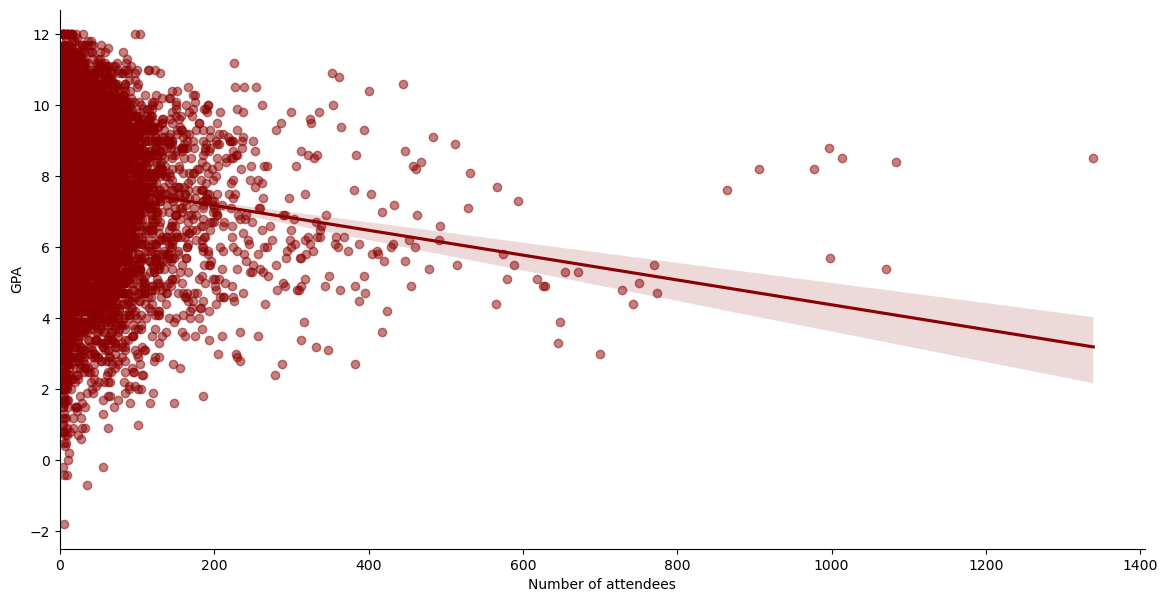

In [15]:
# Convert "Eksamensgennemsnit" to a numeric type
df = pd.read_csv('./cleaned_merged_course_data.csv')
df['Eksamensgennemsnit'] = pd.to_numeric(df['Eksamensgennemsnit'].str.replace(',', '.'), errors='coerce')

# Ensure "Fremmødte" is numeric (if it isn't already)
df['Fremmødte'] = pd.to_numeric(df['Fremmødte'], errors='coerce')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create the regression plot with the color set to red
sns.regplot(y='Eksamensgennemsnit', x='Fremmødte', data=df, color='darkred', ax=ax, scatter_kws={'alpha':0.5})

# Set the limits to ensure (0,0) is at the intersection of the axes
ax.set_xlim(left=0)

# Set the title and axis labels
ax.set_xlabel("Number of attendees")
ax.set_ylabel("GPA")


# Save and show
plt.savefig("figure1.png", bbox_inches='tight', dpi=200)
plt.show()

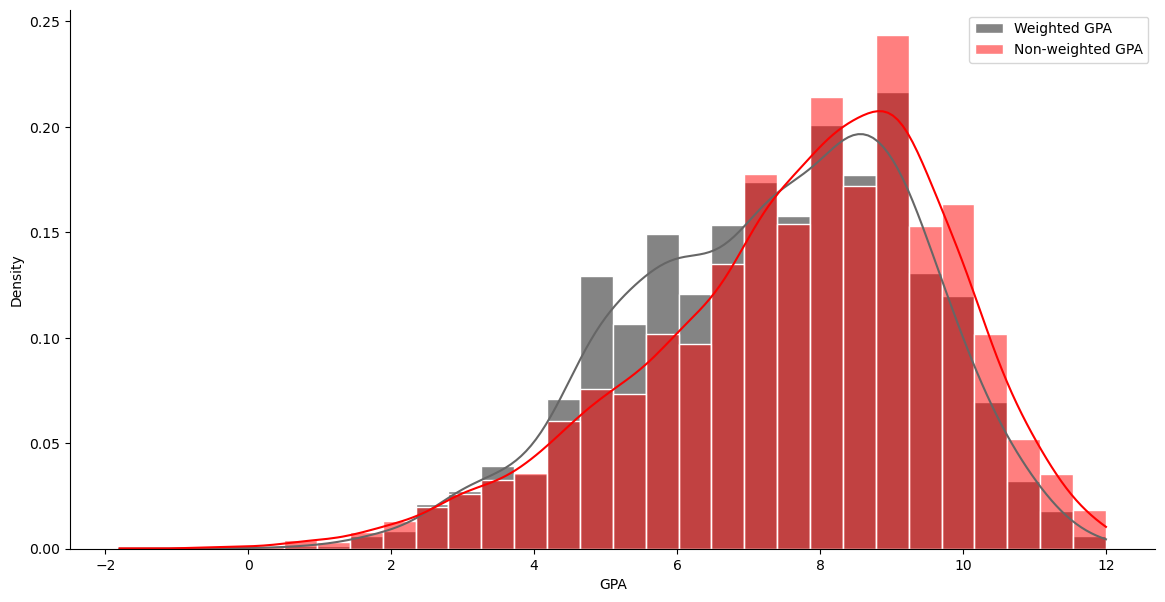

In [16]:
# Ensure 'Eksamensgennemsnit' is treated as a string first, then convert
df['Eksamensgennemsnit'] = df['Eksamensgennemsnit'].astype(str).str.replace(',', '.').astype(float)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the weighted GPA distribution with grey borders and less transparency
sns.histplot(data=df, x='Eksamensgennemsnit', weights='Fremmødte', kde=True, ax=ax, color='0.4', bins=30, 
             stat='density', label='Weighted GPA', edgecolor='1', alpha=0.8)

# Plot the non-weighted GPA distribution with grey borders and less transparency
sns.histplot(data=df, x='Eksamensgennemsnit', kde=True, ax=ax, color='red', bins=30, 
             stat='density', label='Non-weighted GPA', edgecolor='1', alpha=0.5)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend and title
plt.legend()
plt.xlabel('GPA')

# Show the plot
plt.savefig('figure2.png', bbox_inches='tight', dpi=200)
plt.show()

In [17]:
# Ensure the necessary columns are numeric
df['Fremmødte'] = pd.to_numeric(df['Fremmødte'], errors='coerce')
df['Eksamensgennemsnit'] = pd.to_numeric(df['Eksamensgennemsnit'], errors='coerce')

# Group by 'Kursustype' and calculate weighted and unweighted averages
summary_df = df.groupby('Kursustype').apply(
    lambda x: pd.Series({
        'Count': x.shape[0],
        'Weighted GPA': (x['Eksamensgennemsnit'] * x['Fremmødte']).sum() / x['Fremmødte'].sum(),
        'Unweighted GPA': x['Eksamensgennemsnit'].mean()
    })
).reset_index()

# Display the summary table
summary_df

,Kursustype,Count,Weighted GPA,Unweighted GPA
0,Bachelor,1876.0,7.016824,7.187367
1,"Bachelor, Diplomingeniør",126.0,6.709844,6.609524
2,Deltidsmaster,179.0,8.939205,8.850279
3,Diplomingeniør,857.0,5.185486,5.860210
4,Kandidat,3898.0,8.261802,8.308825
5,"Kandidat, Bachelor",103.0,7.435888,7.446602
6,"Kandidat, Bachelor, Diplomingeniør",6.0,5.682218,6.050000
7,"Kandidat, Diplomingeniør",90.0,7.954228,7.303333
8,Ph.d.,56.0,9.443292,9.192857


In [18]:
# Ensure the necessary columns are numeric
df['Fremmødte'] = pd.to_numeric(df['Fremmødte'], errors='coerce')
df['Eksamensgennemsnit'] = df['Eksamensgennemsnit'].astype(str).str.replace(',', '.')
df['Eksamensgennemsnit'] = pd.to_numeric(df['Eksamensgennemsnit'], errors='coerce')

# Calculate weighted and unweighted averages for 'Anden'
anden_rows = df[df['Evalueringsform'] == 'Anden']
if not anden_rows.empty:
    weighted_avg = (anden_rows['Eksamensgennemsnit'] * anden_rows['Fremmødte']).sum() / anden_rows['Fremmødte'].sum()
    unweighted_avg = anden_rows['Eksamensgennemsnit'].mean()

# Ensure 'Anden' is included in the summary output
summary_df = df.groupby('Evalueringsform').apply(
    lambda x: pd.Series({
        'Count': x.shape[0],
        'Weighted Eksamensgennemsnit': (x['Eksamensgennemsnit'] * x['Fremmødte']).sum() / x['Fremmødte'].sum(),
        'Unweighted Eksamensgennemsnit': x['Eksamensgennemsnit'].mean()
    })
).reset_index()

# Display the summary table
summary_df

,Evalueringsform,Count,Weighted Eksamensgennemsnit,Unweighted Eksamensgennemsnit
0,Anden,2.0,7.933526,8.000000
1,Mundtlig eksamen,450.0,8.455872,8.467333
2,Portfolio,5405.0,7.675259,8.081998
3,Skriftlig eksamen,1246.0,5.849813,5.712761
4,Skriftlig og mundtlig eksamen,88.0,6.770776,7.480682


In [19]:
# Ensure the necessary columns are numeric
df['Fremmødte'] = pd.to_numeric(df['Fremmødte'], errors='coerce')
df['Eksamensgennemsnit'] = df['Eksamensgennemsnit'].astype(str).str.replace(',', '.')
df['Eksamensgennemsnit'] = pd.to_numeric(df['Eksamensgennemsnit'], errors='coerce')

# Calculate weighted and unweighted averages, and count for each Hjælpemidler
summary_df = df.groupby('forudsætninger').apply(
    lambda x: pd.Series({
        'Count': x.shape[0],  # Count of occurrences
        'Weighted Eksamensgennemsnit': (x['Eksamensgennemsnit'] * x['Fremmødte']).sum() / x['Fremmødte'].sum(),
        'Unweighted Eksamensgennemsnit': x['Eksamensgennemsnit'].mean()
    })
).reset_index()

# Display the summary table
summary_df

,forudsætninger,Count,Weighted Eksamensgennemsnit,Unweighted Eksamensgennemsnit
0,Ja,5585.0,7.504585,7.797690
1,Nej,1606.0,6.867930,7.307472


In [20]:
# Ensure the necessary columns are numeric
df['Fremmødte'] = pd.to_numeric(df['Fremmødte'], errors='coerce')
df['Eksamensgennemsnit'] = df['Eksamensgennemsnit'].astype(str).str.replace(',', '.')
df['Eksamensgennemsnit'] = pd.to_numeric(df['Eksamensgennemsnit'], errors='coerce')

# Calculate weighted and unweighted averages, and count for each Hjælpemidler
summary_df = df.groupby('Hjælpemidler').apply(
    lambda x: pd.Series({
        'Count': x.shape[0],  # Count of occurrences
        'Weighted Eksamensgennemsnit': (x['Eksamensgennemsnit'] * x['Fremmødte']).sum() / x['Fremmødte'].sum(),
        'Unweighted Eksamensgennemsnit': x['Eksamensgennemsnit'].mean()
    })
).reset_index()

# Display the summary table
summary_df

,Hjælpemidler,Count,Weighted Eksamensgennemsnit,Unweighted Eksamensgennemsnit
0,Ikke tilladt,972.0,7.492445,7.958333
1,Tilladt,6219.0,7.307642,7.645988


In [21]:
# Ensure the necessary columns are numeric
df['Fremmødte'] = pd.to_numeric(df['Fremmødte'], errors='coerce')
df['Eksamensgennemsnit'] = df['Eksamensgennemsnit'].astype(str).str.replace(',', '.')
df['Eksamensgennemsnit'] = pd.to_numeric(df['Eksamensgennemsnit'], errors='coerce')

# Calculate weighted and unweighted averages, and count for each Hjælpemidler
summary_df = df.groupby('Ekstern samarbejdsinstitution').apply(
    lambda x: pd.Series({
        'Count': x.shape[0],  # Count of occurrences
        'Weighted Eksamensgennemsnit': (x['Eksamensgennemsnit'] * x['Fremmødte']).sum() / x['Fremmødte'].sum(),
        'Unweighted Eksamensgennemsnit': x['Eksamensgennemsnit'].mean()
    })
).reset_index()

# Display the summary table
summary_df

,Ekstern samarbejdsinstitution,Count,Weighted Eksamensgennemsnit,Unweighted Eksamensgennemsnit
0,Ja,231.0,7.669832,8.338095
1,Nej,6960.0,7.319927,7.666638


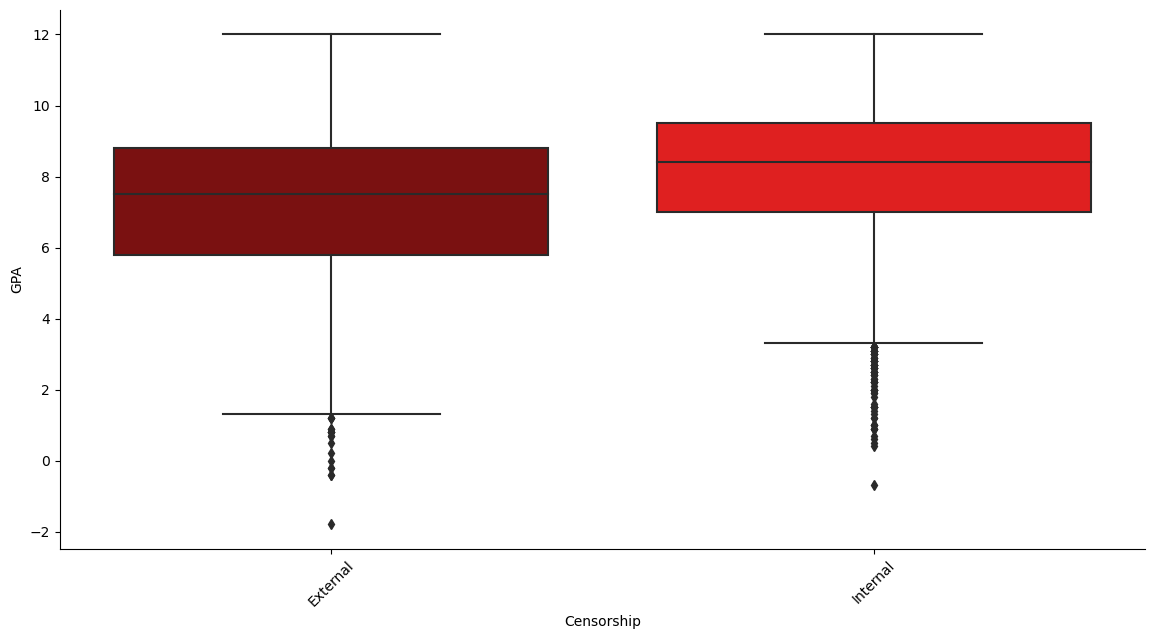

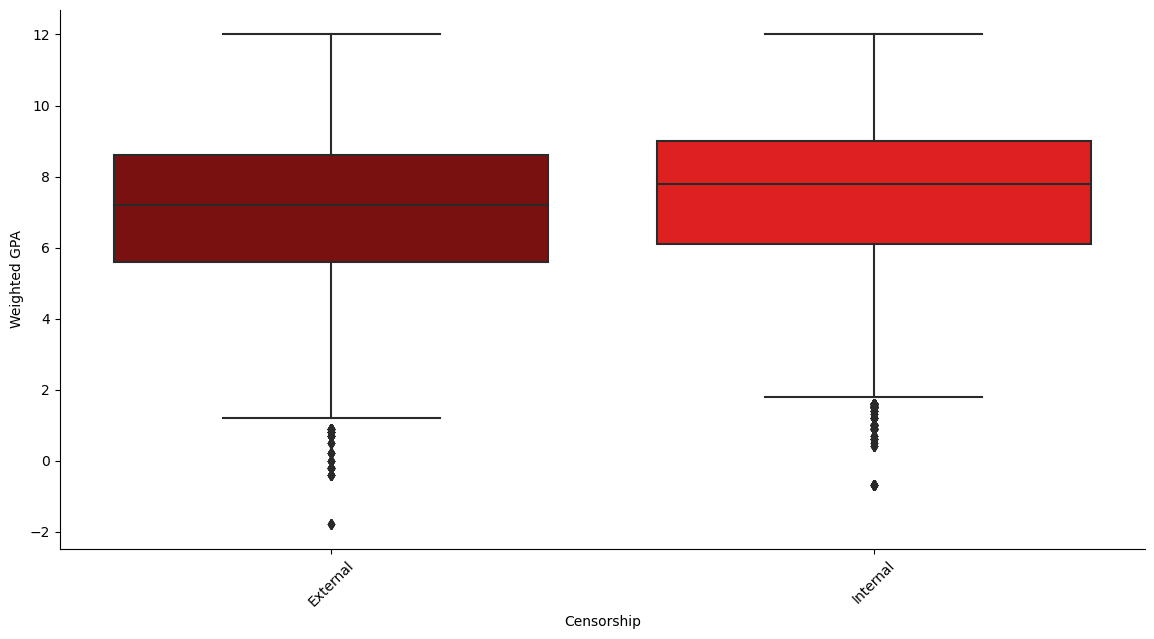

In [22]:
# Ensure necessary columns are numeric
df['Fremmødte'] = pd.to_numeric(df['Fremmødte'], errors='coerce')
df['Eksamensgennemsnit'] = pd.to_numeric(df['Eksamensgennemsnit'], errors='coerce')

# Create a weighted version of 'Eksamensgennemsnit' and expand the dataset
weighted_data = df.loc[df.index.repeat(df['Fremmødte'])].copy()
weighted_data['Weighted Eksamensgennemsnit'] = weighted_data['Eksamensgennemsnit']

# Rename 'Ekstern' to 'External' and 'Intern' to 'Internal'
weighted_data['Bedømmelsesform'] = weighted_data['Bedømmelsesform'].replace({'Ekstern': 'External', 'Intern': 'Internal'})
df['Bedømmelsesform'] = df['Bedømmelsesform'].replace({'Ekstern': 'External', 'Intern': 'Internal'})

# Define the color palette for the box plots
box_color = {'External': 'darkred', 'Internal': 'red'}

# --- Plot Unweighted Box Plot ---
plt.figure(figsize=(14, 7))
sns.boxplot( x='Bedømmelsesform', y='Eksamensgennemsnit', data=df, palette=box_color)
plt.xlabel('Censorship')
plt.ylabel('GPA')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('figure3-unweight.png', bbox_inches='tight', dpi=200)
plt.show()

# --- Plot Weighted Box Plot ---
plt.figure(figsize=(14, 7))
sns.boxplot(x='Bedømmelsesform', y='Weighted Eksamensgennemsnit', data=weighted_data, palette=box_color)
plt.xlabel('Censorship')
plt.ylabel('Weighted GPA')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('figure3-weight.png', bbox_inches='tight', dpi=200)
plt.show()

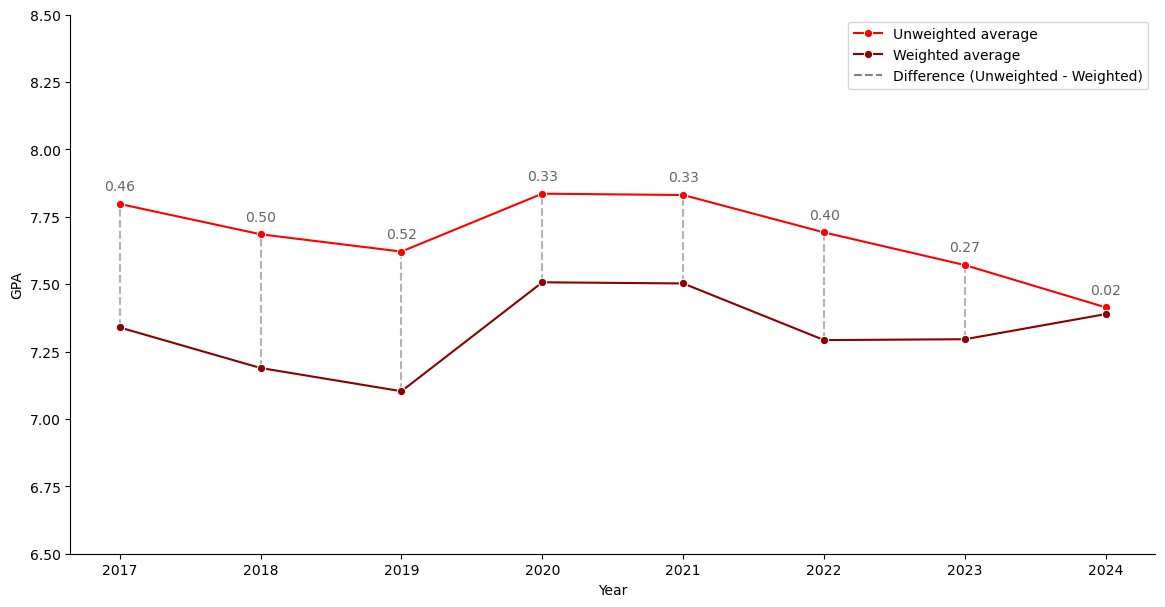

In [23]:
# Ensure necessary columns are numeric
df['Fremmødte'] = pd.to_numeric(df['Fremmødte'], errors='coerce')
df['Eksamensgennemsnit'] = pd.to_numeric(df['Eksamensgennemsnit'], errors='coerce')

# Create a weighted version of 'Eksamensgennemsnit' by expanding the dataset
weighted_data = df.loc[df.index.repeat(df['Fremmødte'])].copy()
weighted_data['Weighted_Eksamensgennemsnit'] = weighted_data['Eksamensgennemsnit']

# Group by 'Year' and calculate the average for the expanded (weighted) dataset
weighted_yearly_avg = weighted_data.groupby('Year')['Weighted_Eksamensgennemsnit'].mean().reset_index()

# Group by 'Year' and calculate the unweighted average from the original data
unweighted_yearly_avg = df.groupby('Year')['Eksamensgennemsnit'].mean().reset_index()

# Calculate the difference between unweighted and weighted averages
difference = unweighted_yearly_avg['Eksamensgennemsnit'] - weighted_yearly_avg['Weighted_Eksamensgennemsnit']

# Plotting both weighted and unweighted Eksamensgennemsnit over the years
plt.figure(figsize=(14, 7))

# Plot unweighted average
sns.lineplot(x='Year', y='Eksamensgennemsnit', data=unweighted_yearly_avg, marker='o', label='Unweighted average', color='red', zorder=2)

# Plot weighted average
sns.lineplot(x='Year', y='Weighted_Eksamensgennemsnit', data=weighted_yearly_avg, marker='o', label='Weighted average', color='darkred', zorder=2)

# Plot the difference as vertical lines and add annotations
for i in range(len(unweighted_yearly_avg)):
    plt.vlines(x=unweighted_yearly_avg['Year'][i], ymin=weighted_yearly_avg['Weighted_Eksamensgennemsnit'][i], ymax=unweighted_yearly_avg['Eksamensgennemsnit'][i], color='0.7', linestyle='--', zorder=1)
    plt.text(unweighted_yearly_avg['Year'][i], unweighted_yearly_avg['Eksamensgennemsnit'][i] + 0.05, f"{difference[i]:.2f}", color='0.4', ha='center')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Create a custom legend entry for the difference lines
plt.plot([], [], color='0.5', linestyle='--', label='Difference (Unweighted - Weighted)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('GPA')
plt.ylim(6.5, 8.5)  # Set y-axis limits to reflect the expected grade range (0-12)
plt.legend()  # Show legend to differentiate between the lines

# Save and show the plot
plt.savefig('figure4.png', bbox_inches='tight', dpi=200)
plt.show()

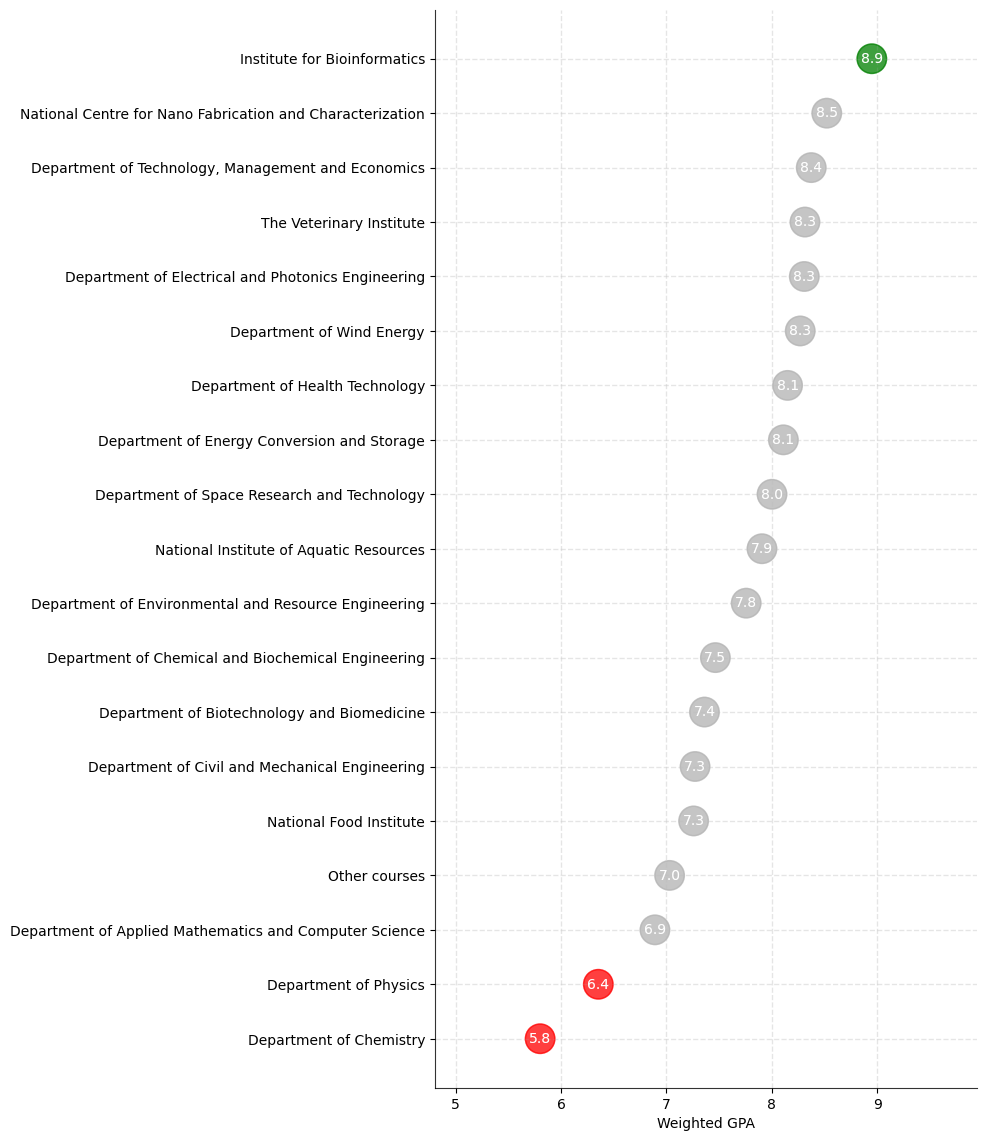

In [24]:
# Ensure necessary columns are numeric
df['Fremmødte'] = pd.to_numeric(df['Fremmødte'], errors='coerce')
df['Eksamensgennemsnit'] = pd.to_numeric(df['Eksamensgennemsnit'], errors='coerce')

# Create a weighted version of 'Eksamensgennemsnit' by expanding the dataset
weighted_data = df.loc[df.index.repeat(df['Fremmødte'])].copy()
weighted_data['Weighted_Eksamensgennemsnit'] = weighted_data['Eksamensgennemsnit']

# Group by 'Institut' and calculate the average for the expanded (weighted) dataset
weighted_institut_avg = weighted_data.groupby('Institut')['Weighted_Eksamensgennemsnit'].mean().reset_index()

# Calculate the overall average of Weighted_Eksamensgennemsnit across all Instituts
overall_avg = weighted_institut_avg['Weighted_Eksamensgennemsnit'].mean()

# Set thresholds for coloring based on 15% above and below the overall average
upper_threshold = overall_avg * 1.15
lower_threshold = overall_avg * 0.85

# Apply coloring based on thresholds
weighted_institut_avg['colors'] = ['red' if x < lower_threshold else 'green' if x > upper_threshold else '0.7' for x in weighted_institut_avg['Weighted_Eksamensgennemsnit']]

# Sort by Weighted Eksamensgennemsnit
df_institut = weighted_institut_avg.sort_values('Weighted_Eksamensgennemsnit')

# Reset index for plotting
df_institut.reset_index(inplace=True)

# Draw the plot
plt.figure(figsize=(7, 14))
plt.scatter(df_institut['Weighted_Eksamensgennemsnit'], df_institut.index, s=450, alpha=0.5, color=df_institut['colors'])

# Add text labels to the points
for x, y, tex in zip(df_institut['Weighted_Eksamensgennemsnit'], df_institut.index, df_institut['Weighted_Eksamensgennemsnit']):
    plt.text(x, y, round(tex, 1), horizontalalignment='center', verticalalignment='center', fontdict={'color': 'white'}, zorder=1)

# Spines
plt.gca().spines["top"].set_alpha(False)
plt.gca().spines["right"].set_alpha(False)
plt.gca().spines["bottom"].set_alpha(0.8)
plt.gca().spines["left"].set_alpha(0.8)

# Customize grid lines
plt.grid(linestyle=('--'), linewidth=1, color='0.8', alpha=0.5, zorder=0)

# Set y-ticks and labels
plt.yticks(df_institut.index, df_institut['Institut'])
plt.xlabel('Weighted GPA')
plt.xlim(min(df_institut['Weighted_Eksamensgennemsnit']) - 1, max(df_institut['Weighted_Eksamensgennemsnit']) + 1)

# Ensure scatter points and labels are on top of the grid
plt.scatter(df_institut['Weighted_Eksamensgennemsnit'], df_institut.index, s=450, alpha=0.5, color=df_institut['colors'], zorder=3)
for x, y, tex in zip(df_institut['Weighted_Eksamensgennemsnit'], df_institut.index, df_institut['Weighted_Eksamensgennemsnit']):
    plt.text(x, y, round(tex, 1), horizontalalignment='center', verticalalignment='center', fontdict={'color': 'white'}, zorder=4)

# Save and show
plt.savefig('figure5.png', bbox_inches='tight', dpi=200)
plt.show()